# <font color="blue">Question 1: </font>
## <font color="sky blue">Use Digit dataset and perform the Logistic Regression. Import the dataset from Sklearn</font>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, ensemble, metrics, dummy
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
digits = load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


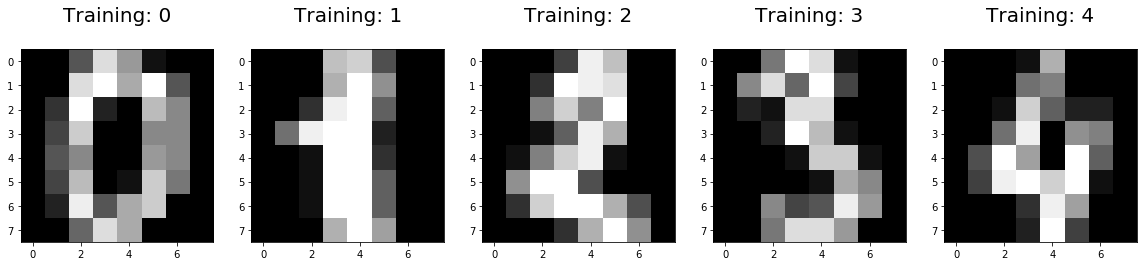

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
logRegr = LogisticRegression() # the model
logRegr.fit(x_train, y_train)
print(logRegr.predict(x_test[0].reshape(1,-1)), logRegr.predict(x_test[0:10]))
predictions = logRegr.predict(x_test)
score = logRegr.score(x_test, y_test)
print("Accuracy=",score)

[2] [2 8 2 6 6 7 1 9 8 5]
Accuracy= 0.9511111111111111


In [5]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


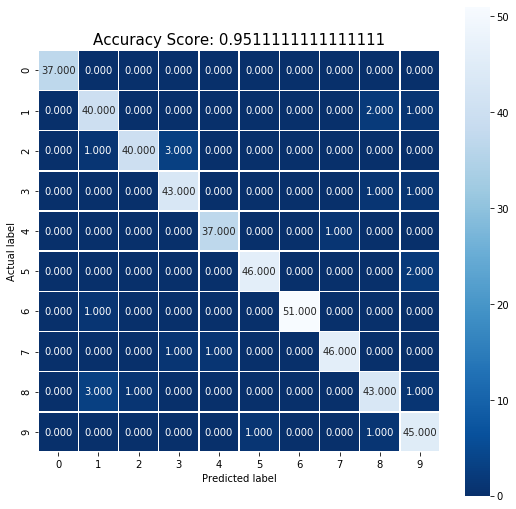

In [6]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

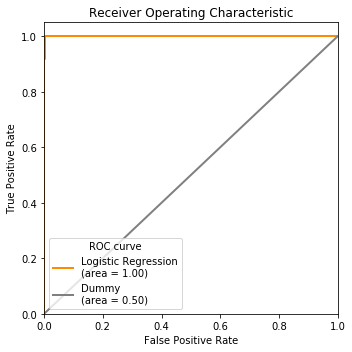

DIGIT- 0
______________________________________________________________


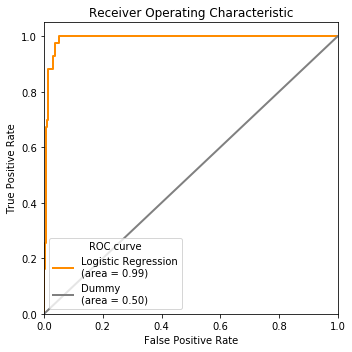

DIGIT- 1
______________________________________________________________


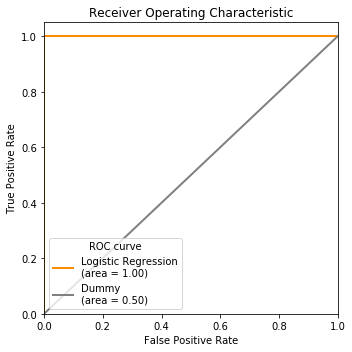

DIGIT- 2
______________________________________________________________


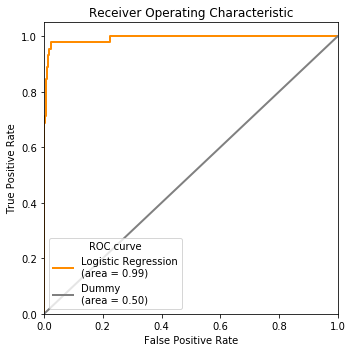

DIGIT- 3
______________________________________________________________


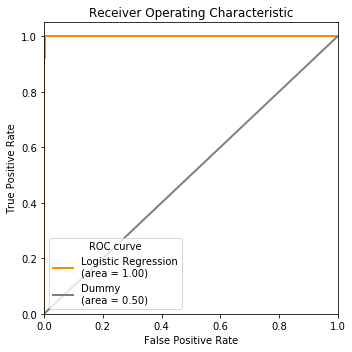

DIGIT- 4
______________________________________________________________


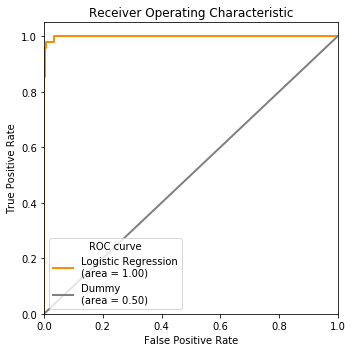

DIGIT- 5
______________________________________________________________


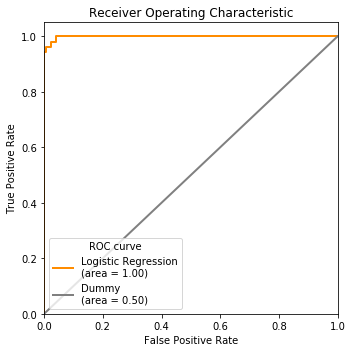

DIGIT- 6
______________________________________________________________


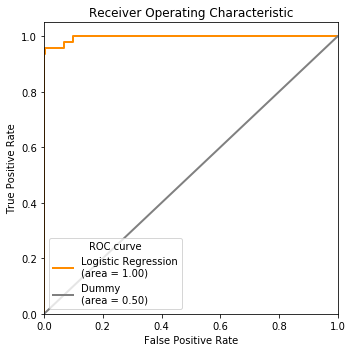

DIGIT- 7
______________________________________________________________


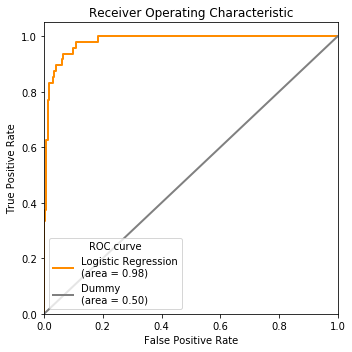

DIGIT- 8
______________________________________________________________


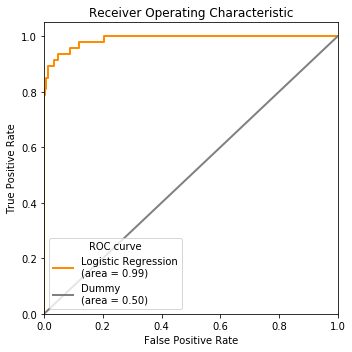

DIGIT- 9
______________________________________________________________


In [13]:
for i in range(10):
    ith = (digits.target == i)
    most_frequent = dummy.DummyClassifier(strategy='most_frequent')

    X_train, X_test, y_train, y_test = train_test_split(digits.data, ith, random_state=0)

    y_score = logRegr.fit(X_train, y_train).predict_proba(X_test)
    most_frequent_score = most_frequent.fit(X_train,y_train).predict_proba(X_test)

    fpr, tpr, _ = metrics.roc_curve(y_test, y_score[:, 1])
    roc_auc = metrics.auc(fpr, tpr)

    fpr_dummy, tpr_dummy, _ = metrics.roc_curve(y_test,most_frequent_score[:, 1])
    roc_auc_dummy = metrics.auc(fpr_dummy, tpr_dummy)

    plt.figure(figsize=(5, 5))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='Logistic Regression\n(area = %0.2f)' % roc_auc)
    plt.plot(fpr_dummy, tpr_dummy, color='.5',lw=lw, label='Dummy\n(area = %0.2f)' % roc_auc_dummy)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower left", title='ROC curve')
    plt.tight_layout()
    plt.show()
    print("DIGIT-",i)
    print("______________________________________________________________")